# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The purpose of this exercise is to variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods.

**Variational Monte Carlo**

The Variational Monte Carlo method is based on the principle that given a trial wave function $\psi_T$, the variational energy $E_T$, which is the normalized mean value of the hamiltonian on this state, is always greater than the ground state energy $E_0$:

$$ E_T = \frac{\langle\Psi_T|\hat{H}|\Psi_T\rangle}{\langle\Psi_T|\Psi_T\rangle}\geq E_0 = \frac{\langle\Psi_0|\hat{H}|\Psi_0\rangle}{\langle\Psi_0|\Psi_0\rangle}$$

i.e. $E_T$ reaches its minimum value when $\psi_T$ coincides with the ground state $\psi_0$. Thus, a method to approximate the energy of the ground state involves the search for the trial function that minimizes its energy. If the wave function is parametrized by a set of variational parameters, the task is to find those who lead to the minimum energy.

An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

where $\sigma$ and $\mu$ are the variational parameters. Thus, the model for the Hamiltonian is the following:$$\hat H\, \Psi_T^{\sigma,\mu}(x) =(\hat K + \hat V) \, \Psi_T^{\sigma,\mu}(x) =   -\frac{1}{2m}\frac{\partial^2}{\partial x^2}\Psi_T^{\sigma,\mu}(x) + V(x)\,\Psi_T^{\sigma,\mu}(x)$$

### Exercise 08.1

As a first step, we wanto to implement a code for sampling the trial wave function $|\Psi_T(x)|^2$.

This can be done using the Metropolis algorithm, with an uniform transition probability $T(x_{new}|x_{old})$. As a similar code has been implemented in exercise (5), we just adapt it to the new probability density function to sample and to 1D space. Using data blocking, we compute the expectation value for the Hamiltonian:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used next to find the parameters that minimize this quantity.

To do so, for this first simulation we set the parameters of the wave function to trial values: $\mu=0$ and $\sigma=1$.

The simulation is run for $M=5 \times 10^5$ steps, divided in $N=100$ blocks. It is started from $x_0=0$, which is the maximum of $|\Psi_T(x)|^2$, and operates with time step $\delta=2.1$ (that gives acceptance rate of $\sim 50\%$).

The expectation value for the Hamiltonian obtained with this simulation is shown in the picture below.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

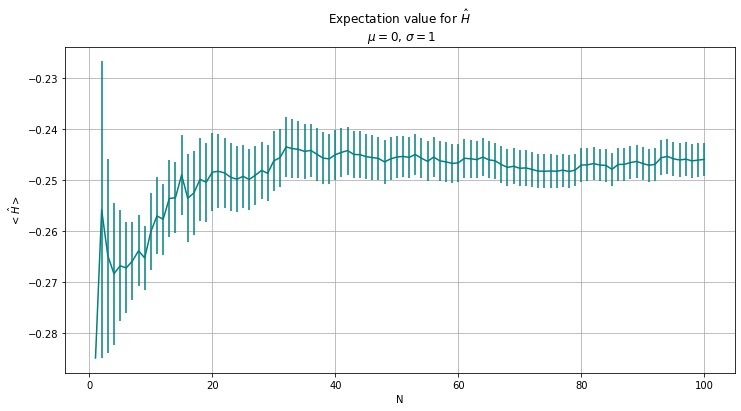

In [24]:
xe, ye, erre = np.loadtxt('8.1-2/results/energy1.out', usecols=(0,1,2), unpack=True)

fig=plt.figure(figsize=(12, 6))
plt.title("Expectation value for $\hat H$ \n $\mu=0$, $\sigma=1$")
plt.errorbar(xe, ye, yerr=erre, color='teal')
plt.ylabel('$<{\hat H}>$')
plt.xlabel('N')
plt.grid(True)
plt.show()

### Exercise 08.2

We want now to use our Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$.

In order to do so, we run the simulation few times with different values of $\sigma$ and $\mu$, we take the last value of the expectation values of $\hat H _T$ for each simulation and we find the minimum among them. 

In order to optimize the time step $\delta$ for the different simulations, as the parameters change every time, we implement the code to do it automatically.

According to our simulations, the optimized parameters that minimize $\langle {\hat H} \rangle_T$ are the following:
- $\mu=0.78$
- $\sigma=0.62$

We thus show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks $N$ for those parameters.

We also show a picture of the sampled $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, to compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see the code below).

In [25]:
mu=0.78
sigma=0.62
E_min=-0.444009

In [26]:
def analytical_sol(x, mu, sigma):
    psi_t = np.exp(-0.5*pow((x-mu)/sigma,2)) + np.exp(-0.5*pow((x+mu)/sigma,2))
    norm = 2.*np.sqrt(np.pi)*sigma*(1 + np.exp(-(mu/sigma)**2)) 
    return psi_t**2/ norm

In [27]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

psi2= analytical_sol(x,0.78,0.62)

Ground state energy:  -0.46046587969271535


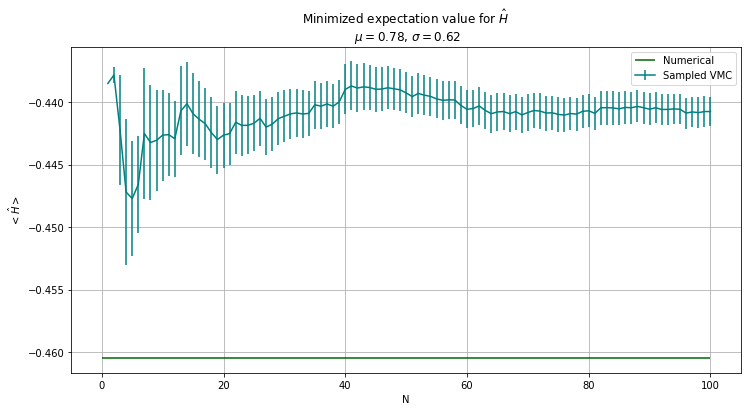

In [28]:
xe, ye, erre = np.loadtxt('8.1-2/results/energy.out', usecols=(0,1,2), unpack=True)

fig=plt.figure(figsize=(12, 6))
plt.title("Minimized expectation value for $\hat H$ \n $\mu=0.78$, $\sigma=0.62$")
plt.errorbar(xe, ye, yerr=erre, color='teal', label='Sampled VMC')
plt.hlines(E[0], 0, 100, color='darkgreen', label='Numerical')
plt.ylabel('$<{\hat H}>$')
plt.xlabel('N')
plt.grid(True)
plt.legend()
plt.show()

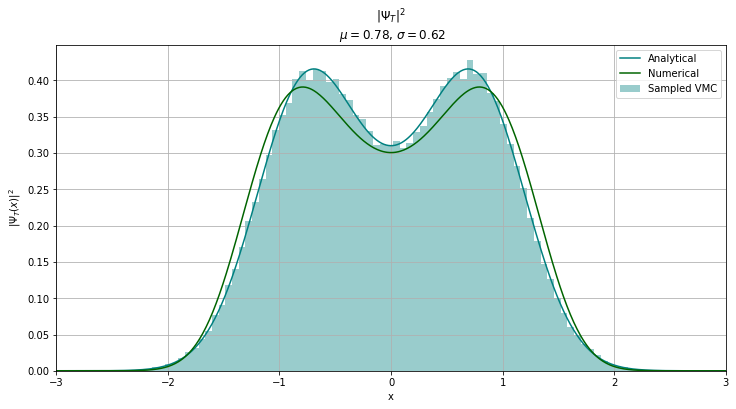

In [29]:
pos=np.loadtxt("8.1-2/results/positions.out")

fig=plt.figure(figsize=(12, 6))

plt.hist(pos,100, color='teal', alpha=0.4, density=True, label='Sampled VMC')
plt.plot(x, psi2, color = "teal", label='Analytical')
plt.plot(x,(psi[0])**2, color='darkgreen', label='Numerical')

plt.title('$|\Psi_T|^2$ \n $\mu=0.78$, $\sigma=0.62$')
plt.xlabel('x')
plt.ylabel('$|\Psi_T(x)|^2$')
plt.xlim(-3,3)
plt.grid(True)
plt.legend()
plt.show()

### Exercise 08.3

Here we use the provided PIMC/PIGS code to study the same 1D quantum system. 

We first use the PIGS algorithm ($T=0$) to evaluate the minimized expectation value for $\hat H$ using:
- a constant trial wave function, $\Psi_T(x)=1$
- $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters we have optimized.

To do so, we apply only few changes to the code: we change the external potential and its derivatives to the $V(x)$ considered and the wave function and its derivatives to $\Psi_T(x)$. We also optimize the simulation parameters in order to obtain $\sim 50 \%$ acceptance rates:

- for PIGS:
    - brownian motion reconstructions: $59$
    - delta translation: $0.56$
    - brownian bridge reconstructions: $112$

- for PIMC:
    - delta translation: $2.3$
    - brownian bridge reconstructions: $82$

We then compare the results with the previous.

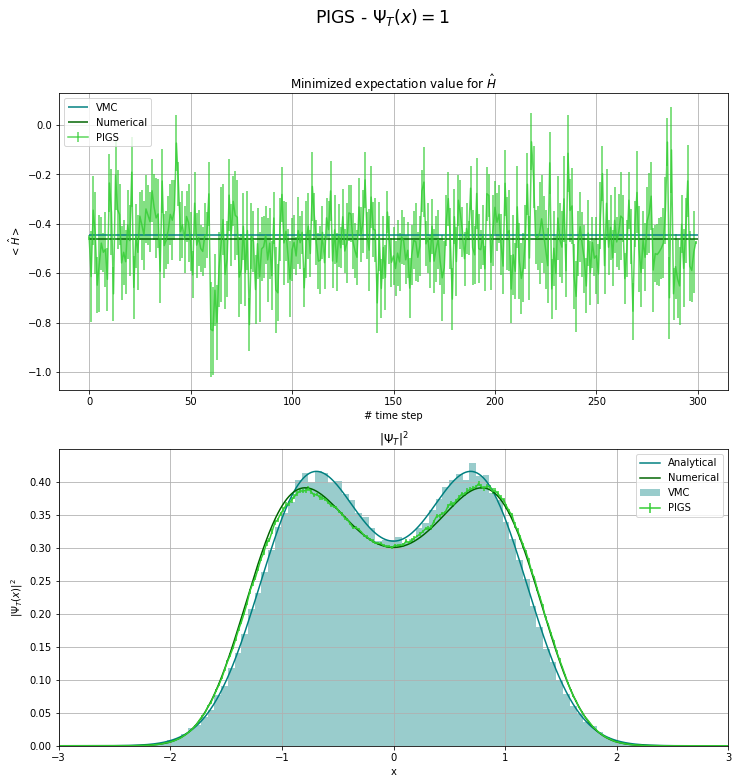

In [30]:
xk, yk, errk = np.loadtxt('8.3/constant/kinetic.dat', usecols=(0,1,2), unpack=True)
xp, yp, errp = np.loadtxt('8.3/constant/potential.dat', usecols=(0,1,2), unpack=True)

xe=xk
ye=yk+yp
erre=(errk**2+errp**2)**0.5

xpr, ypr, errpr = np.loadtxt('8.3/constant/probability.dat', usecols=(0,1,2), unpack=True)


fig=plt.figure(figsize=(12, 12))
plt.suptitle('PIGS - $\Psi_T(x)=1$', size='xx-large')

plt.subplot(211)
plt.title("Minimized expectation value for $\hat H$")
plt.errorbar(xe, ye, erre, color='limegreen',alpha=0.8, label="PIGS")
plt.hlines(E_min, 0, 300, color='teal', label='VMC')
plt.hlines(E[0], 0, 300, color='darkgreen', label='Numerical')
plt.ylabel('$<{\hat H}>$')
plt.xlabel('# time step')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.hist(pos,100, color='teal', alpha=0.4, density=True, label='VMC')
plt.plot(x, psi2, color = "teal", label='Analytical')
plt.plot(x,(psi[0])**2, color='darkgreen', label='Numerical')
plt.errorbar(xpr, ypr, errpr, color='limegreen', label="PIGS")

plt.title('$|\Psi_T|^2$')
plt.xlabel('x')
plt.ylabel('$|\Psi_T(x)|^2$')
plt.xlim(-3,3)
plt.grid(True)
plt.legend()


plt.show()

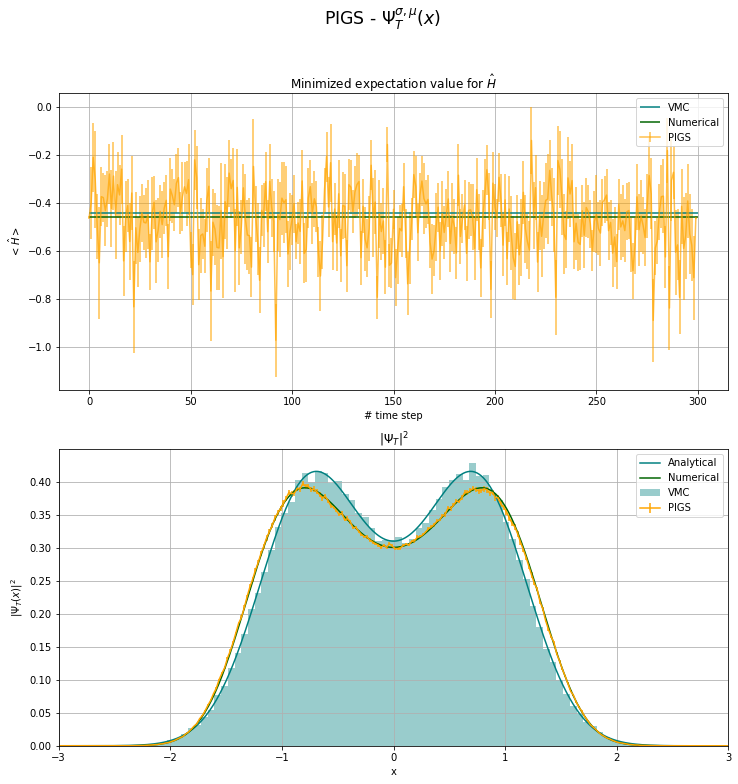

In [31]:
xk, yk, errk = np.loadtxt('8.3/gaussian/kinetic.dat', usecols=(0,1,2), unpack=True)
xp, yp, errp = np.loadtxt('8.3/gaussian/potential.dat', usecols=(0,1,2), unpack=True)

xe=xk
ye=yk+yp
erre=(errk**2+errp**2)**0.5

xpr, ypr, errpr = np.loadtxt('8.3/gaussian/probability.dat', usecols=(0,1,2), unpack=True)

fig=plt.figure(figsize=(12, 12))
plt.suptitle('PIGS - $\Psi_T^{\sigma,\mu}(x)$', size='xx-large')

plt.subplot(211)
plt.title("Minimized expectation value for $\hat H$")
plt.errorbar(xe, ye, erre, color='orange', alpha=0.7, label="PIGS")
plt.hlines(E_min, 0, 300, color='teal', label='VMC')
plt.hlines(E[0], 0, 300, color='darkgreen', label='Numerical')
plt.ylabel('$<{\hat H}>$')
plt.xlabel('# time step')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.hist(pos,100, color='teal', alpha=0.4, density=True, label='VMC')
plt.plot(x, psi2, color = "teal", label='Analytical')
plt.plot(x,(psi[0])**2, color='darkgreen', label='Numerical')
plt.errorbar(xpr, ypr, errpr, color='orange', label="PIGS")

plt.title('$|\Psi_T|^2$')
plt.xlabel('x')
plt.ylabel('$|\Psi_T(x)|^2$')
plt.xlim(-3,3)
plt.grid(True)
plt.legend()


plt.show()

Since the PIGS code have largely fluctuating values of energy, their mean value is comparable with both the VMC and the numerical results.

In the picture of $|\Psi_T|^2$ we can notice though that the PIGS method has results more similar to the numerical ones than to the VMC's.

Then, we want to vary the imaginary time propagation to test how much we can reduce it and obtain good results at the same time. We do this by using $\Psi_T^{\sigma,\mu}(x)$ and running the code some times while changing the input parameter $\tau$.

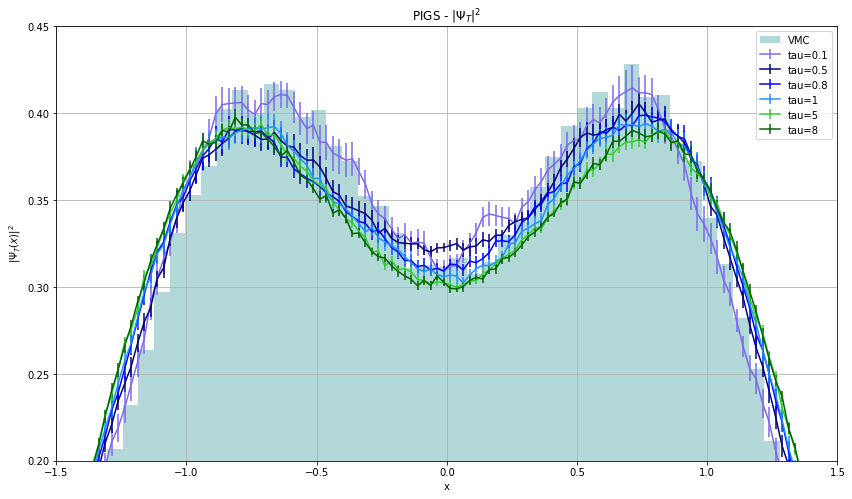

In [32]:
tau=[0.1,0.5,0.8,1,5,8]
colors=['mediumslateblue','navy','blue','dodgerblue','limegreen','darkgreen']

fig=plt.figure(figsize=(14,8))

plt.hist(pos,100, color='teal', alpha=0.3, density=True, label='VMC')

for i in range(6):
    x, y, err = np.loadtxt('8.3/PIGS/probability_'+str(tau[i])+'.dat', usecols=(0,1,2), unpack=True)
    plt.errorbar(x, y,yerr=err, color=colors[i], label='tau='+str(tau[i]))

plt.title('PIGS - $|\Psi_T|^2$')
plt.xlabel('x')
plt.ylabel('$|\Psi_T(x)|^2$')
plt.xlim(-1.5, 1.5)
plt.ylim((0.2,0.45))
plt.grid(True)
plt.legend()

plt.show()

Given these results, we can say it is better not to reduce $\tau$ under $0.8$, as the sampled $|\Psi_T(x)|^2$ becomes less symmetrical and irregular.

Finally, we use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations of $|\Psi_T(x)|^2$ change by increasing the temperature. We run the code some times while changing the temperature $T$ and we picture our results below.

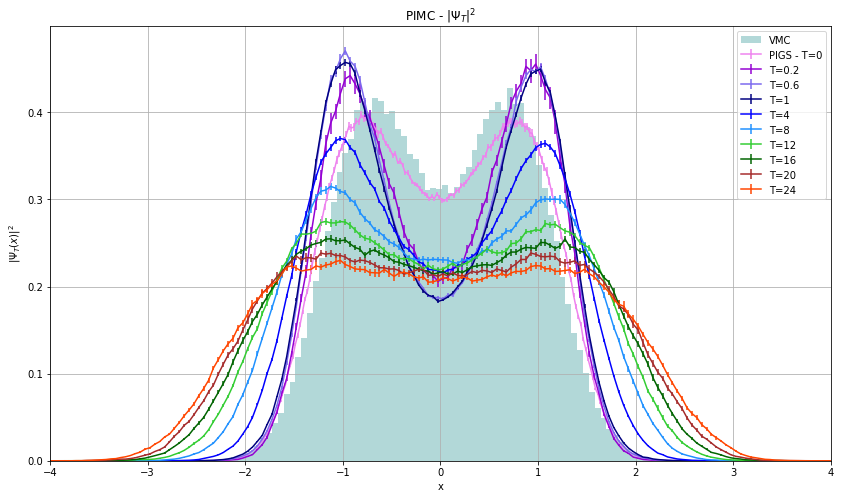

In [33]:
t=[0.2,0.6,1,4,8,12,16,20,24]
colors=['darkviolet','mediumslateblue','navy','blue','dodgerblue','limegreen','darkgreen','brown','orangered']

fig=plt.figure(figsize=(14,8))

plt.hist(pos,100, color='teal', alpha=0.3, density=True, label='VMC')
plt.errorbar(xpr, ypr, errpr, color='violet', label="PIGS - T=0")

for i in range(9):
    x, y, err = np.loadtxt('8.3/PIMC/probability_'+str(t[i])+'.dat', usecols=(0,1,2), unpack=True)
    plt.errorbar(x, y,yerr=err, color=colors[i], label='T='+str(t[i]))
    
plt.title('PIMC - $|\Psi_T|^2$')
plt.xlabel('x')
plt.ylabel('$|\Psi_T(x)|^2$')
plt.xlim(-4, 4)
plt.grid(True)
plt.legend()

plt.show()

As expected, with increasing temperature the sampled $|\Psi_T|^2$, which represent the spatial configuration of the particle confined by the external potential, becomes smooth for the effect of the increasing thermal agitation. For low temperatures, on the other side, the well of the curves becomes steeper, since, for the reason that the temperature is not zero, the system is not completely in the ground state and there is superposition with the first excited state $|\Psi_1|^2$ (see below).

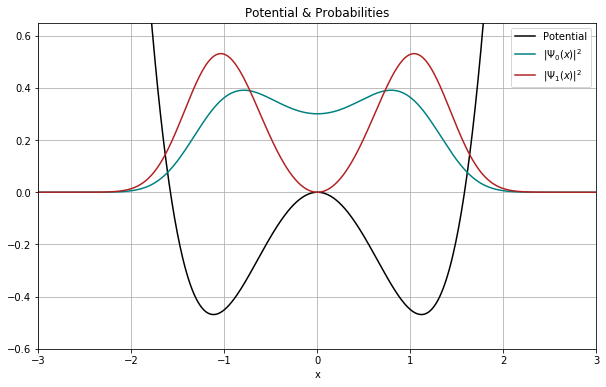

In [34]:
x = np.linspace(-a/2, a/2, N)
scale = 0.3

fig=plt.figure(figsize=(10,6))
plt.title('$|\Psi_T|^2$')

plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, color='teal', label='$|\Psi_0(x)|^2$')
plt.plot(x,(psi[1])**2, color='firebrick', label='$|\Psi_1(x)|^2$')
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.65))
plt.legend()

plt.show()